In [6]:
import os
import torch
from einops import rearrange
from visualize import visualize_grid_attention_v2
import numpy as np
from PIL import Image
from torchvision import transforms as T
from sklearn.decomposition import PCA
from math import sqrt

In [7]:
# feature_maps_path = "/home/yfyuan/YYF/Rerender/exp/spacial/cond/"
feature_maps_path = "/home/yfyuan/YYF/Rerender/exp/attn_map/inv_input_block_spatial_map"
pca = PCA(n_components=3)

In [70]:
# feature_type = "input_block" # 1 2 4 5 7 8 10 11
feature_type = "output_block" # 0 1 2 3 4 5 6 7 8 9 10 11 
# block idx
pos = "out"
# pos = "in"
block_idx = 9
# i is step
i = 15

In [71]:
# feature_map = torch.load(os.path.join(feature_maps_path, f"{feature_type}_{block_idx}_{pos}_layers_features_time_{1}.pt"))[0]
feature_map = torch.load(os.path.join(feature_maps_path, f"{feature_type}_{block_idx}_self_attn_{pos}_time_{1}.pt"))[0]
# feature_map = torch.load(os.path.join(feature_maps_path, f"output_block_9_self_attn_in_time_1.pt"))[0]
# output_block_9_self_attn_in_time_1.pt
print(feature_map.shape)
# feature_map = feature_map.reshape(feature_map.shape[0], -1).t()
# print(feature_map.shape)
feature_map = feature_map.cpu().numpy()
pca.fit(feature_map)
feature_maps_pca = pca.transform(feature_map)
feature_maps_pca = feature_maps_pca.reshape(1, -1, 3)
pca_img_ = feature_maps_pca[0]

torch.Size([4608, 320])


In [72]:
n = pca_img_.shape[0]
h = 1
w = 1
for i in range(1,int(sqrt(n))+1):
    if(n % i == 0):
        if(n // h >= w):
            h = i
            w = n // h
print(n,h,w)

4608 64 72


In [73]:
pca_img_.shape

(4608, 3)

In [74]:
h1 = int(h*0.9)
w1 = int(w*0.4)
h2 = int(h*0.9)
w2 = int(w*0.9)

h3 = int(h*0.8)
w3 = int(w*0.8)
pca_img = pca_img_.reshape(h, w, 3)
pca_img_min = pca_img.min(axis=(0, 1))
pca_img_max = pca_img.max(axis=(0, 1))
pca_img = (pca_img - pca_img_min) / (pca_img_max - pca_img_min)
# pca_img[h1:h1+4,w1:w1+4,:] = 0.
# pca_img[h2:h2+4,w2:w2+4,:] = 0.
# pca_img[h3:h3+4,w3:w3+4,:] = 1.
print(pca_img.shape)
pca_img = Image.fromarray((pca_img * 255).astype(np.uint8))
pca_img = T.Resize(512, interpolation=T.InterpolationMode.NEAREST)(pca_img)

(64, 72, 3)


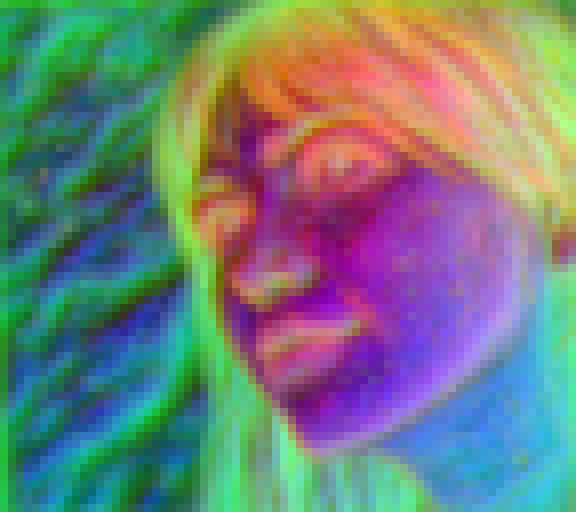

In [69]:
display(pca_img)

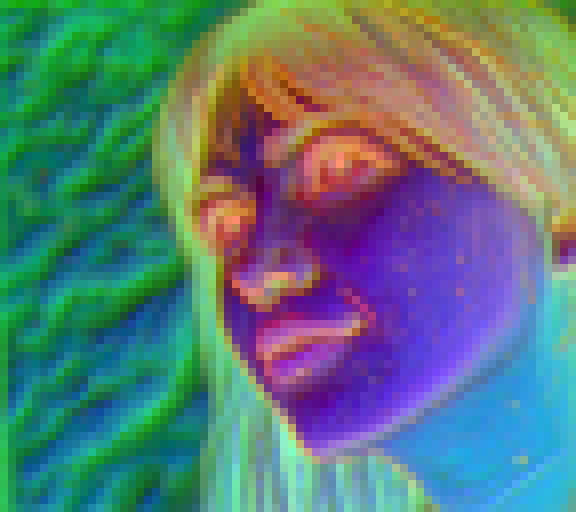

In [75]:
display(pca_img)

In [283]:
a = torch.ones((5,6,10))

In [284]:
b = torch.zeros((5,3,10))

In [285]:
a[:,:b.shape[1],...] = b

In [286]:
print(a)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0.,

In [740]:
import torch
import einops

In [746]:
a = torch.tensor([1,2,3,4,5,6,7,8,9,10]).repeat(3,1)

In [747]:
a

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [750]:
b = einops.rearrange(a,'b (h d) -> (b h) d', h=5)

In [751]:
b

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]])